<a href="https://colab.research.google.com/github/sxzeu/XAI_study/blob/main/4_PimaIndian_diabetes_set_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from google.colab import files
import numpy as np
import pandas as pd
import io

uploaded = files.upload()

Saving diabetes.csv to diabetes (14).csv


In [69]:
dataset = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))


# 새 섹션

In [70]:
type(dataset)

pandas.core.frame.DataFrame

In [71]:
# X와 Y로 데이터 분리
dataset.to_numpy()
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=7)

In [72]:
# 학습 데이터로 모델 학습 시키기
model = XGBClassifier()
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# 평가하기
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 81.17%


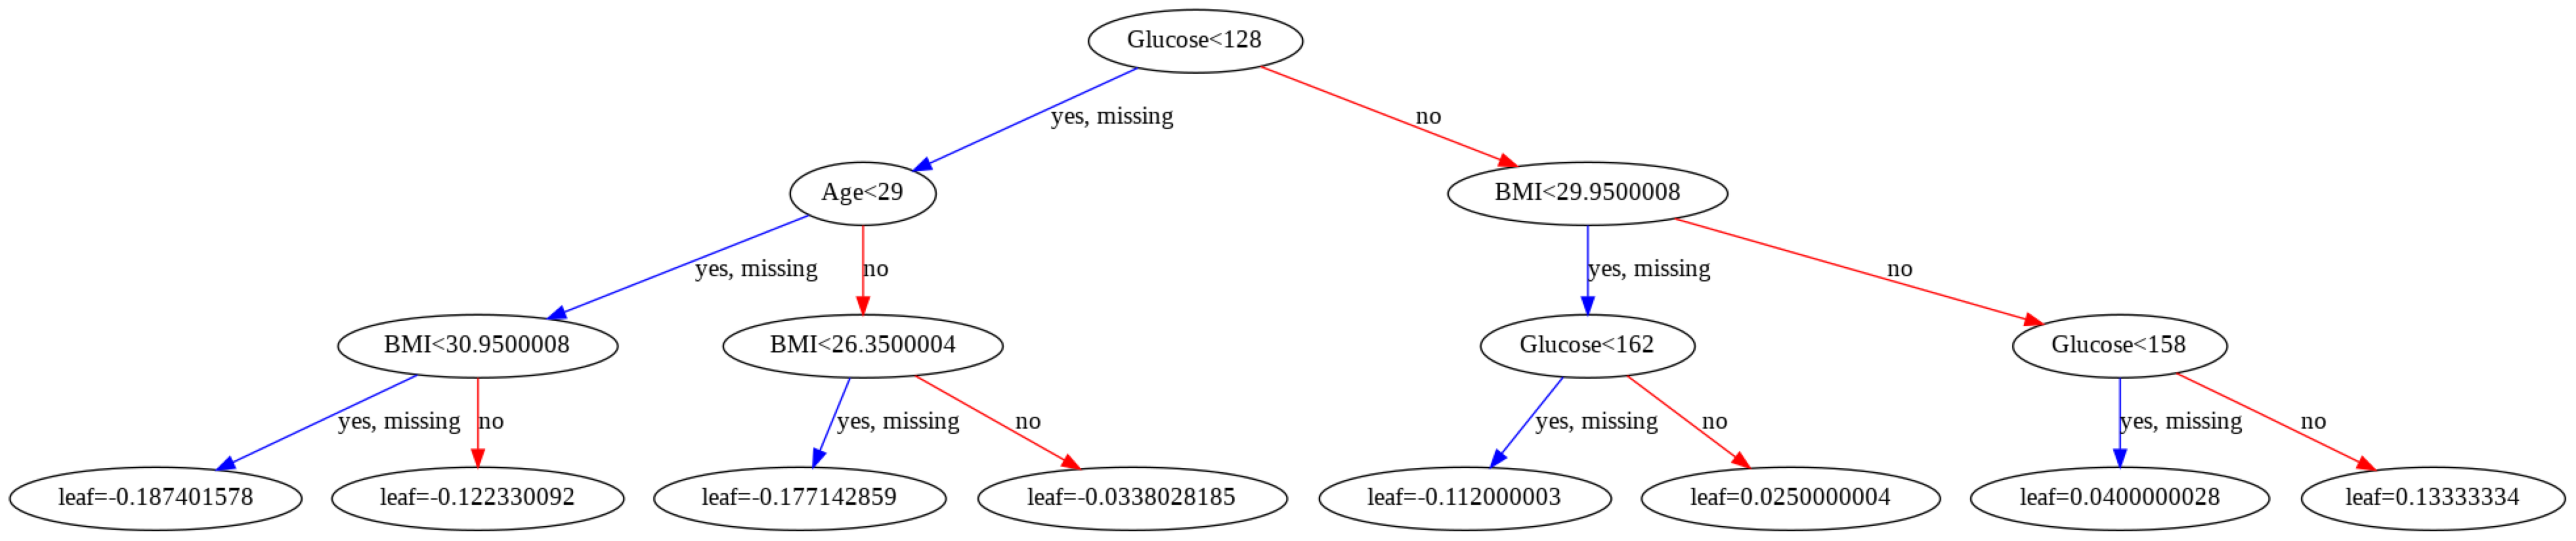

In [73]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100,200

#의사 결정 트리 시각화
plot_tree(model)
plt.show()

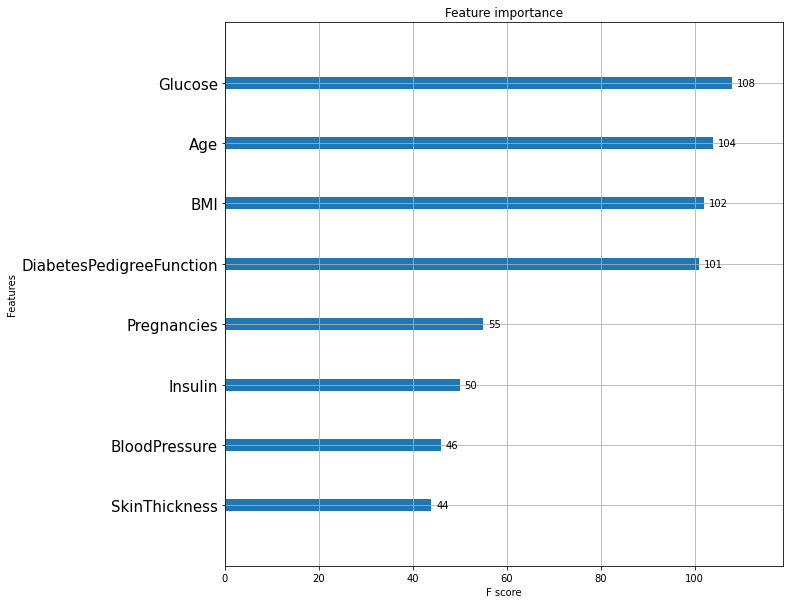

In [74]:
# 트리의 깊이를 제한하지 않았을 때 피처 중요도를 계산하고 시각화 하기

from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

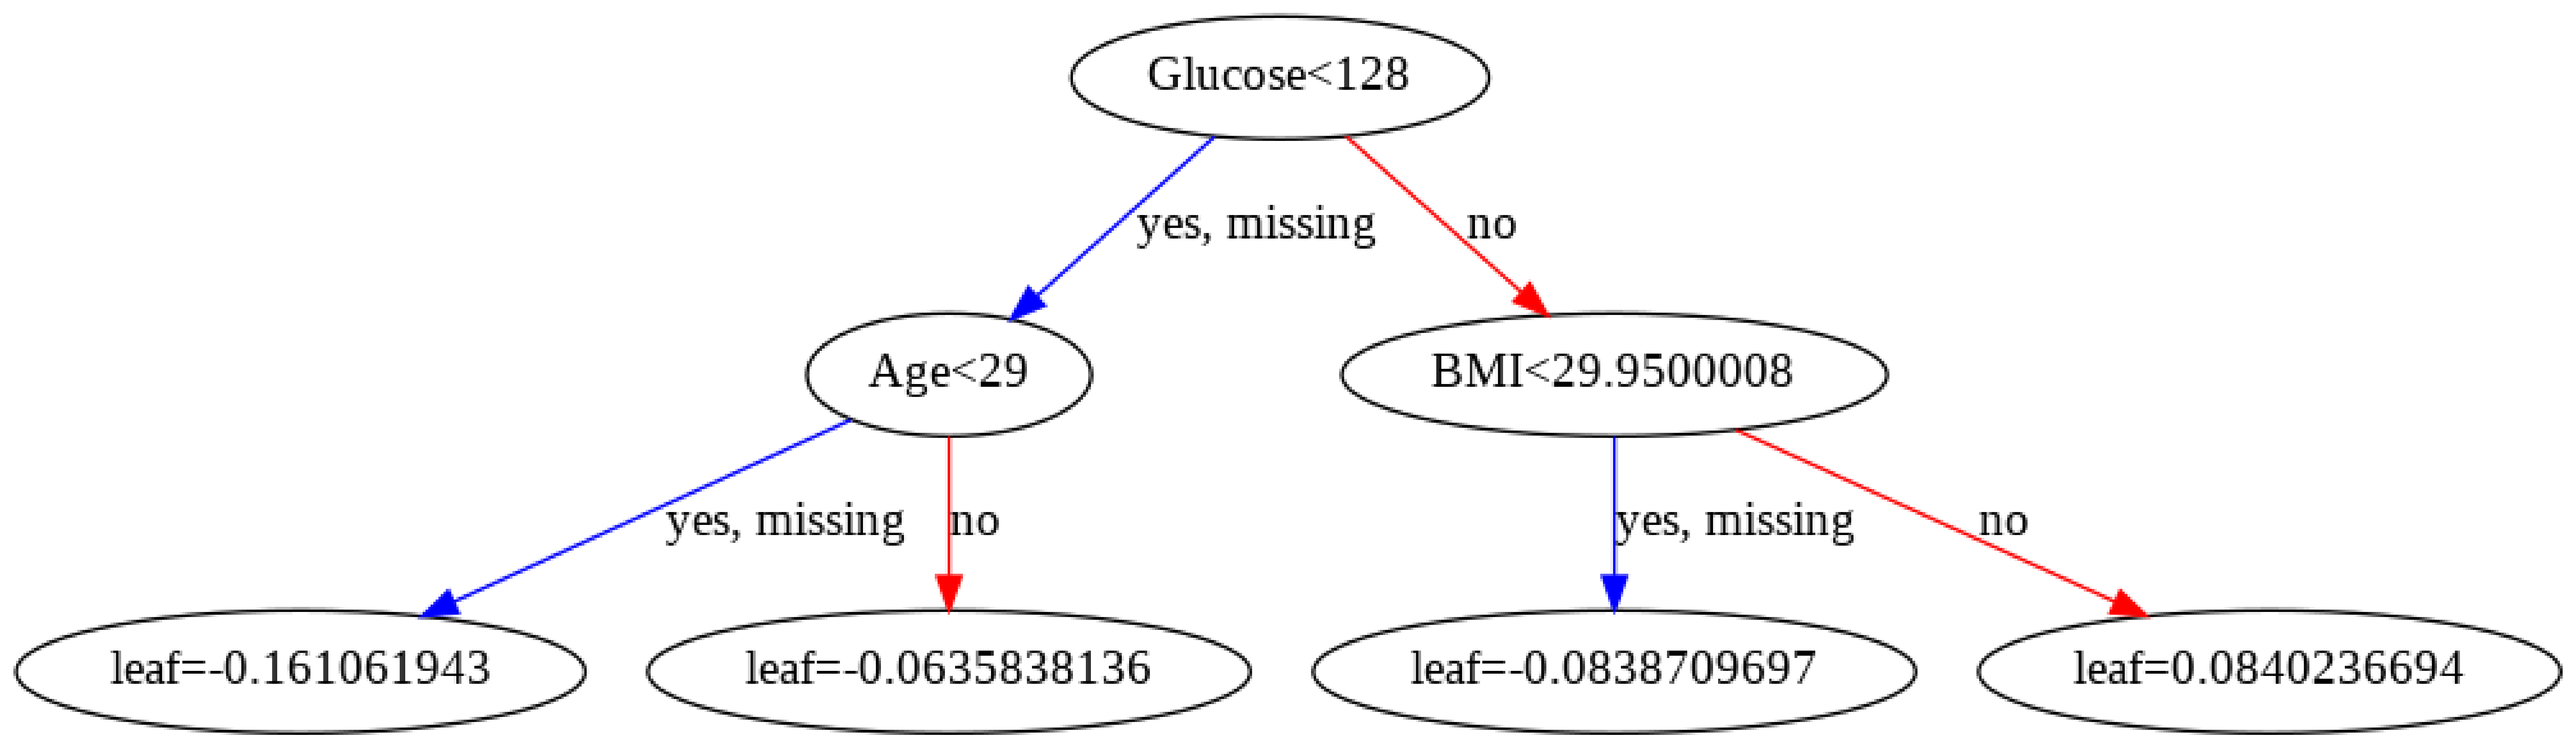

Accuracy: 81.17%


In [76]:
# 학습 데이터로 모델을 학습시키기, 트리의 깊이 제한 두기
model = XGBClassifier(max_depth=2)
model.fit(x_train, y_train)
rcParams['figure.figsize'] = 100,200

#의사 결정 트리 시각화
plot_tree(model)
plt.show()

# 평가하기
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

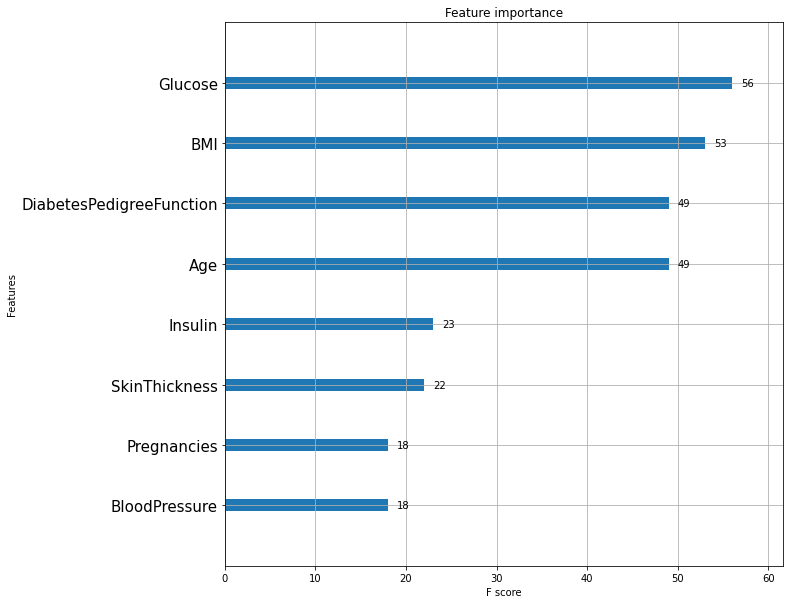

In [77]:
# 트리의 깊이를 2로 제한했을 때 피처 중요도를 계산하고 시각화 하기

from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

In [85]:
! pip install pdpbox

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


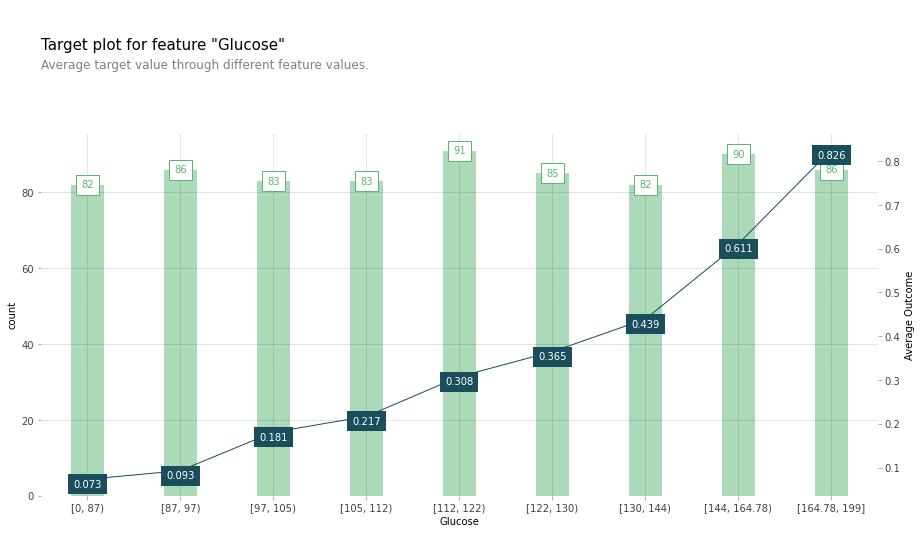

In [80]:
# 부분 의존성 플롯 그리기. 피처의 수치 변화에 따라 모델에 기여하는 정도 확인 
# 특정 피처에 대해 여유분(buffer)을 함께 표시해 피처 간 독립을 보장 못하는 환경에서 어느 정도 모델에 오차가 있을 수 있는지 확인할 수 있게 해줌

from pdpbox import info_plots

pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)

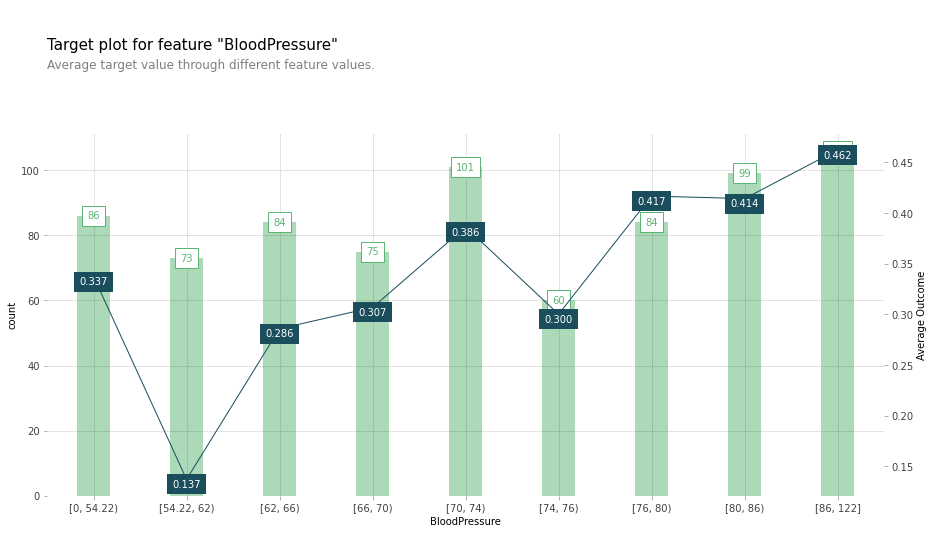

In [81]:
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target=pima_target
)

In [82]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


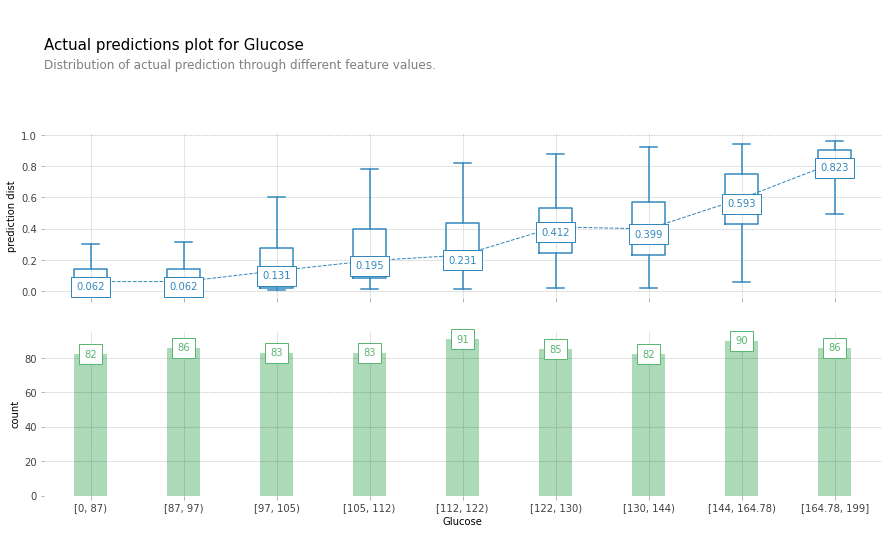

In [83]:
# GTT 데이터에 대한 모델의 실제 예측 분포 플롯을 그리는 코드

fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=pima_data[pima_features],
    feature='Glucose',
    feature_name='Glucose',
    predict_kwds={}
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


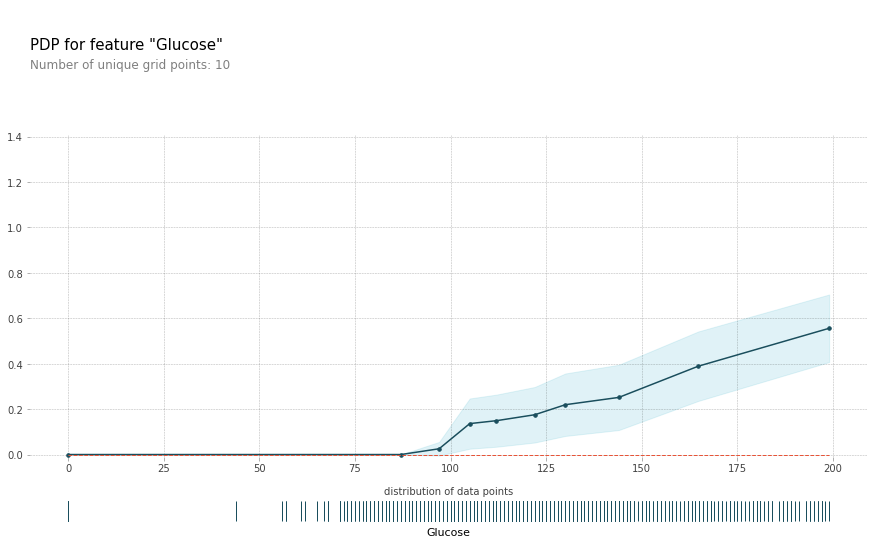

In [88]:
# GTT 테스트 피처에 대해 부분 의존성을 계산하고 플롯을 그리는 코드
from pdpbox import pdp
pdp_gc = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='Glucose'
)

# 플롯 정보 설정
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=False,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

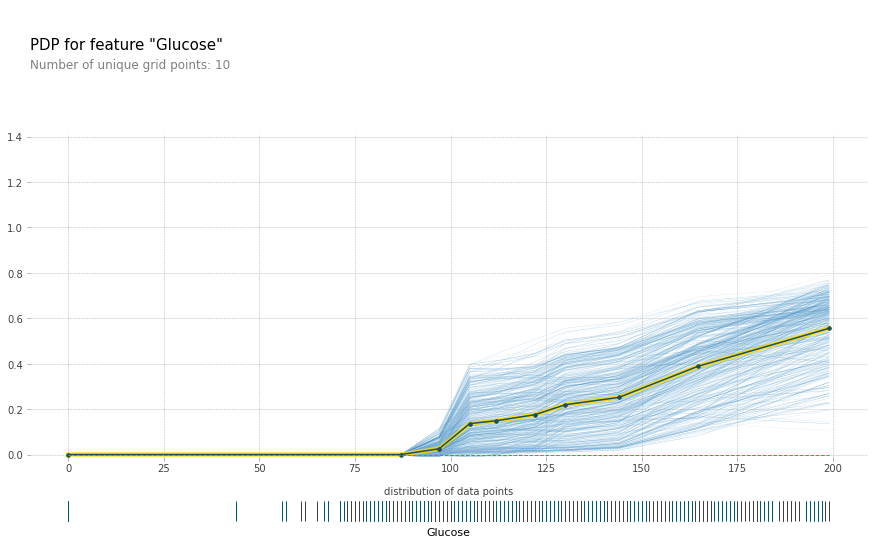

In [89]:
# GTT 테스트 피처에 대해 부분 의존성을 계산하고 플롯을 그리는 코드
from pdpbox import pdp
pdp_gc = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='Glucose'
)

# 플롯 정보 설정
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist=True
)

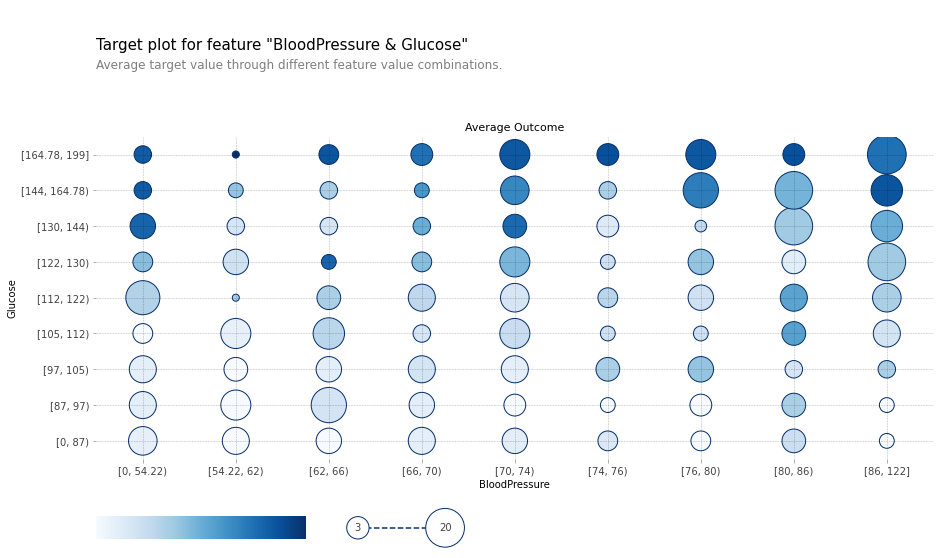

In [92]:
# 혈압과 GTT 테스트 데이터 두 피처에 대해 목표 플롯을 그리는 코드
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data,
    features=['BloodPressure','Glucose'],
    feature_names=['BloodPressure','Glucose'],
    target=pima_target
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


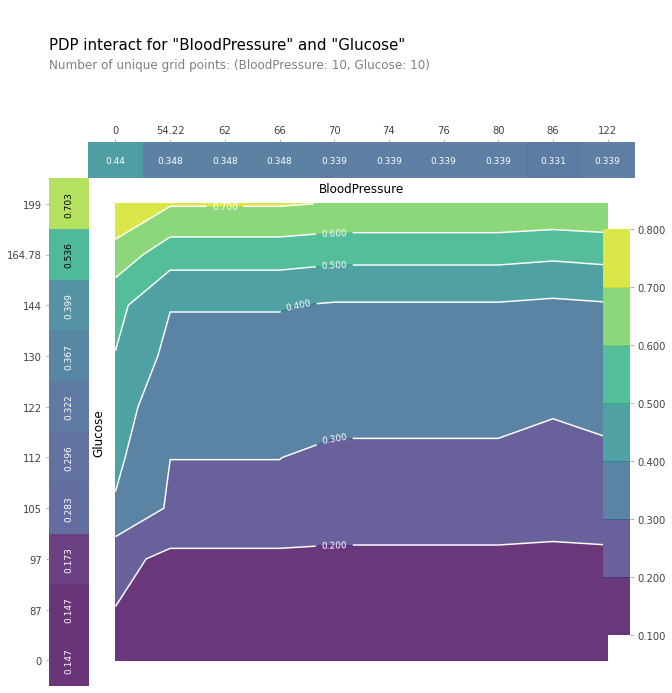

In [94]:
# 혈압과 GTT 테스트 데이터로 모델에 대한 부분 의존성 플롯을 그리는 코드

pdp_interaction = pdp.pdp_interact(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    features=['BloodPressure','Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=['BloodPressure','Glucose'],
    plot_type='contour',
    x_quantile=True,
    plot_pdp=True
)

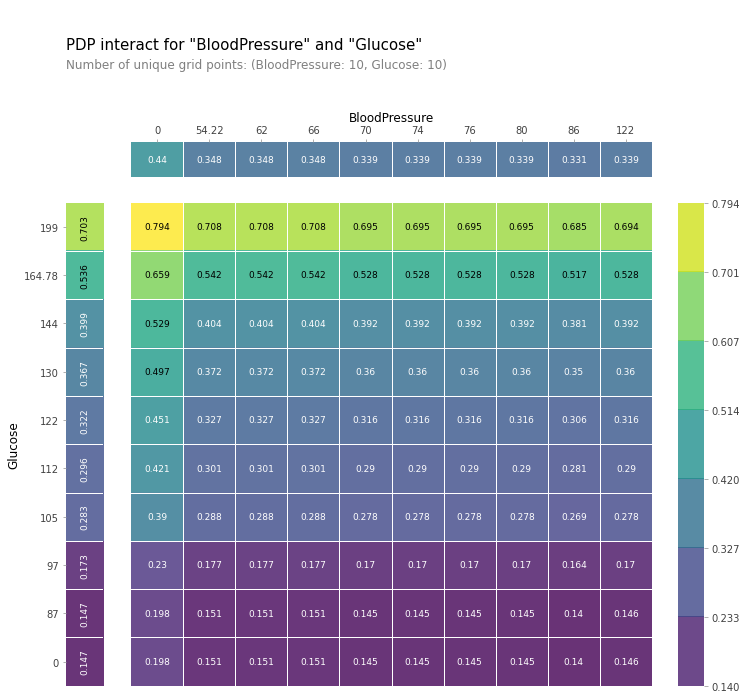

In [95]:
# 혈압과 GTT 테스트 데이터로 모델에 대한 부분 의존성 플롯을 그리는 코드

pdp_interaction = pdp.pdp_interact(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    features=['BloodPressure','Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=['BloodPressure','Glucose'],
    plot_type='grid',
    x_quantile=True,
    plot_pdp=True
)

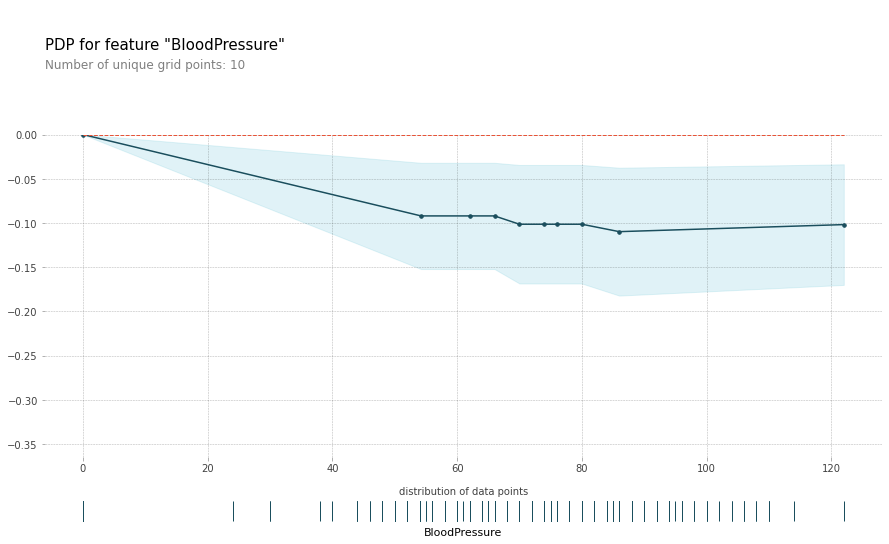

In [97]:
# 혈압 정보를 계산 하는 코드

pdp_bp = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='BloodPressure'
)

# 혈압에 대한 PDP 정보를 플롯

fig, axes = pdp.pdp_plot(pdp_bp,
                         'BloodPressure',
                         plot_lines=False,
                         frac_to_plot=0.5,
                         plot_pts_dist=True)